In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,log_loss


In [57]:
#Loading your dataset 

df=pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Machine_Learning\Logistic_Regresssion\HeartDis_dataset.csv")

In [58]:
#To check the fist five lines of dataset as how the data looks like
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [65]:
#To check the entire information of dataframe with all its existing datatypes of columnwise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [103]:
# df['TenYearCHD'].nunique()

df['male'].nunique()

2

In [66]:
df.shape

(4238, 16)

##### Performing EDA and Feature Engineering on dataset

In [152]:
#Checking all the null values columnwise

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [79]:
# Removing null values from each columns.
df.dropna(inplace=True,axis=1)

In [80]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [83]:
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [90]:
#Separating data into dependent and independent variables

X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [158]:
#Invoking the method of MinMaxScaler function from sklearn library
scaler=MinMaxScaler()


In [161]:
X=scaler.fit_transform(X)


In [173]:
#Splitting the data into train and test data

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [163]:
# Training the model based on LogisticRegression Algorithm

log=LogisticRegression(random_state=20,max_iter=10000)

In [179]:
X_train.shape


(2742, 15)

In [180]:

y_train.shape

(2742, 1)

In [181]:
log.fit(X_train,y_train)

C:\Users\dtdee\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=10000, random_state=20)

In [165]:
y_pred=log.predict(X_test)

In [166]:
y_test[0:10]


array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [167]:

y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### MODEL EVALUATION


In [168]:
# Checking the accuracy score

accuracy_score(y_test,y_pred)

0.8566739606126915

In [169]:
# Checking the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       776
           1       0.82      0.07      0.12       138

    accuracy                           0.86       914
   macro avg       0.84      0.53      0.52       914
weighted avg       0.85      0.86      0.80       914



In [170]:
cnf=confusion_matrix(y_pred,y_test)

In [171]:
cnf

array([[774, 129],
       [  2,   9]], dtype=int64)

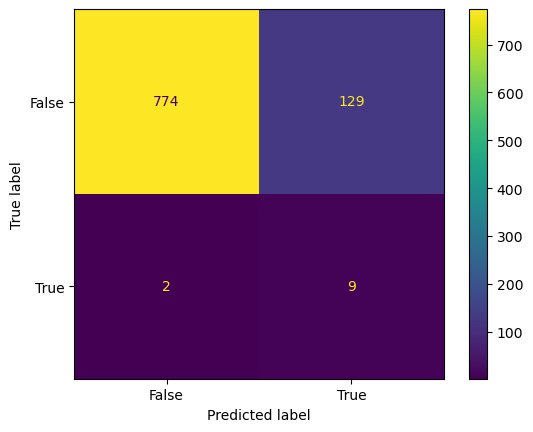

In [172]:
cdisplay=metrics.ConfusionMatrixDisplay(cnf,display_labels=[False,True])
cdisplay.plot()
plt.show()